# Convolutional Neural Network Implementation with Keras and TensorFlow: CIFAR-10 Dataset
This Jupyter notebook demonstrates the implementation of a feedforward neural network using Keras and TensorFlow. The goal of this assignment is to walk through the process of building, training, and evaluating a neural network for image classification. We will use the MNIST or CIFAR-10 dataset as per your choice.<br>
Dataset: https://www.cs.toronto.edu/%7Ekriz/cifar.html <br>
Info: The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

## Assignment Steps:

**a. Import the necessary packages**: We will start by importing the required Python libraries, including Keras, TensorFlow, and other essential packages.

**b. Load the training and testing data**: In this step, we will load the dataset (either MNIST or CIFAR-10) for training and testing the neural network.

**c. Define the network architecture using Keras**: Here, we will define the architecture of our feedforward neural network, specifying the number of layers, neurons, and activation functions.

**d. Train the model using SGD (Stochastic Gradient Descent)**: We will use the Stochastic Gradient Descent optimizer to train the neural network on the training data.

**e. Evaluate the network**: After training, we will evaluate the performance of the model on the testing data to assess its accuracy and other relevant metrics.

**f. Plot the training loss and accuracy**: We will create plots to visualize the training loss and accuracy over epochs, providing insights into the model's learning progress.

Feel free to follow along with the code and explanations provided in this notebook to gain a better understanding of building and training neural networks for image classification.

# Build the Image classification model by dividing the model into following 4 stages:
a. Loading and preprocessing the image data<br>
b. Defining the model’s architecture<br>
c. Training the model<br>
d. Estimating the model’s performance<br>

Note: Both assignment can use this code accordingly

In [20]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD

In [22]:
# Load the training and testing data from CSV files
train = pd.read_csv(r"train_data.csv")
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,...,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,...,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,...,195,184,169,196,189,171,195,190,171,1


In [23]:
x_train = train.drop(['label'], axis = 1).values
y_train = train['label'].values
x_train.shape

(50000, 3072)

In [26]:
x_train = x_train.reshape((50000, 32, 32, 3)).astype('float32')/255

In [28]:
test = pd.read_csv(r"test_data.csv")
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9996,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9997,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9998,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [30]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (32, 32, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

sgd = SGD(learning_rate = 0.1)
model.compile(optimizer= sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

C:\Users\Shreyas Patil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,050 (3.14 MB)

 Trainable params: 822,986 (3.14 MB)

 Non-trainable params: 64 (256.00 B)

In [32]:
r = model.fit(x_train, y_train, validation_split=0.2, epochs = 11, batch_size = 64)

Epoch 1/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.2436 - loss: 2.3770 - val_accuracy: 0.4230 - val_loss: 1.5976
Epoch 2/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.4389 - loss: 1.5355 - val_accuracy: 0.5410 - val_loss: 1.2956
Epoch 3/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.5292 - loss: 1.3060 - val_accuracy: 0.5624 - val_loss: 1.2372
Epoch 4/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.5940 - loss: 1.1423 - val_accuracy: 0.6029 - val_loss: 1.1328
Epoch 5/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6364 - loss: 1.0159 - val_accuracy: 0.5813 - val_loss: 1.1858
Epoch 6/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6683 - loss: 0.9329 - val_accuracy: 0.6433 - val_loss: 1.0229
Epoch 7/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6866 - loss: 0.8721 - val_accuracy: 0.5630 - val_loss: 1.4575
Epoch 8/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7169 - loss: 0.7817 - 

In [33]:
x_test = test.drop(['label'], axis = 1).values
y_test = test['label'].values
x_test.shape

(10000, 3072)

In [36]:
x_test = x_test.reshape((10000, 32, 32, 3)).astype('float32')/255

In [38]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [40]:
predictions

array([[1.01743506e-04, 1.07660333e-06, 4.88954177e-03, ...,
        2.81234443e-05, 2.04842584e-03, 3.80255733e-06],
       [6.93667680e-05, 2.96712713e-03, 2.64755474e-11, ...,
        2.11261390e-12, 9.96834695e-01, 1.28786094e-04],
       [2.51928329e-01, 3.72255407e-02, 6.79356558e-03, ...,
        7.99027621e-04, 6.95434213e-01, 5.06637758e-03],
       ...,
       [8.32490550e-05, 1.69102236e-06, 1.83869496e-01, ...,
        6.40342571e-03, 6.72342458e-06, 3.63595973e-05],
       [1.47882178e-01, 3.68092149e-01, 1.30946338e-01, ...,
        1.94368623e-02, 5.68206748e-03, 8.23994167e-03],
       [5.41576537e-06, 2.72805901e-05, 3.24373948e-04, ...,
        9.94383931e-01, 1.66244774e-07, 1.29000625e-07]], dtype=float32)

In [42]:
r.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [44]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6366 - loss: 1.1689
Test Loss: 1.1720
Test Accuracy: 0.6386


In [54]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

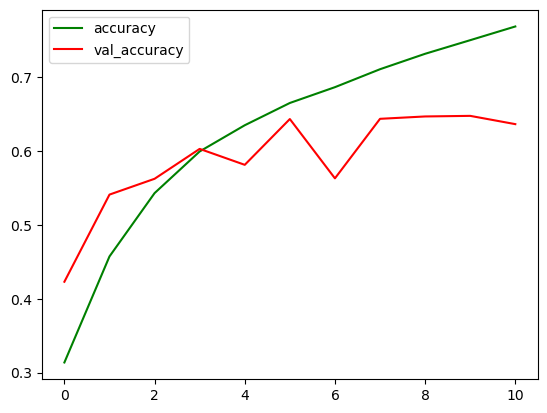

In [56]:
plt.plot(r.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy', color = 'red')
plt.legend()

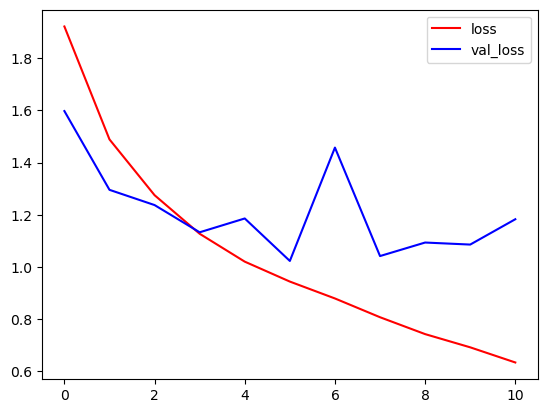

In [58]:
plt.plot(r.history['loss'], label = 'loss', color = 'red')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()

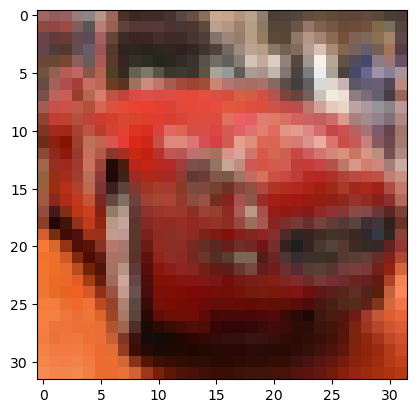

In [82]:
# predicted_value=model.predict(x_test)
# plt.imshow(x_test[13])
# plt.show()
# print(np.argmax(predicted_value[13], axis=0))
image=x_train[5]
plt.imshow(np.squeeze(image),cmap='gray')

In [84]:
image=image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
image.shape

(1, 32, 32, 3)

In [86]:
predict_model = model.predict([image])
print("Pedicted class: {}".format(np.argmax(predict_model)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Pedicted class: 1
